In [92]:
import os;
import numpy as np;
from numpy import linalg as LA;
import matplotlib.pyplot as plt

# Import the data
dir_path = os.path.dirname(os.path.realpath('.')) + "/CSE250B hw7/" ;
fname = dir_path + "hw7-data0.txt"
print fname, os.path.isfile(fname) 
tab = np.genfromtxt(dir_path+'hw7-data0.txt', delimiter=' ')
print tab.shape

# Seperate the data be label as plotting scatters is easier that way
labels,data=tab[:,2],tab[:,:2]
DATA = {label: data[labels==label] for label in np.unique(labels)}   
print len(DATA), DATA[0].shape, DATA[1].shape, DATA[2].shape, DATA[3].shape

/Users/bmehaffy/Documents/GitHub/UCSD_CSE/CSE250B hw7/hw7-data0.txt True
(48, 3)
4 (12, 2) (15, 2) (9, 2) (12, 2)


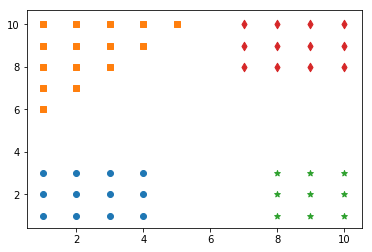

===Done===


In [93]:
X = tab[:,0]
Y = tab[:,1]
Z = tab[:,2].astype(int)
shape = ['o','s','*','d']

for i in range(4):
    plt.scatter(DATA[i][:,0],DATA[i][:,1], marker=shape[i])
plt.show()
print "===Done==="

In [94]:
# Define necessary functions
def maxIndex(a):
    top = a[0]
    index = 0
    for i in range(len(a)):
        if a[i] > top:
            top = a[i]
            index = i
    return index;

def predict(W,xx,yy):
    return maxIndex(W.dot([[1],[xx],[yy]]))
print "===Done==="

===Done===


In [95]:
# Build the multiclass perceptron
W = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
terminate = False;
count,patience = 0,10000
while(not terminate):
    terminate = True
    for i in range(len(X)):
        # predict based on current Z
        xx,yy,zz = X[i],Y[i],Z[i]
        z_hat = predict(W,xx,yy)

        # update the perception
        if zz != z_hat:
            W[zz,:] = W[zz,:] + np.array([1,xx,yy])
            W[z_hat,:] = W[z_hat,:] - np.array([1,xx,yy])
            terminate = False
    count += 1
    if(count > patience):
        terminate = True
print W


for d in tab:
    print d, predict(W,d[0],d[1])

print "===Done==="


[[ 62.   5.  -8.]
 [-16. -46.  35.]
 [-13.  29. -34.]
 [-33.  12.   7.]]
[ 1.  1.  0.] 0
[ 1.  2.  0.] 0
[ 1.  3.  0.] 0
[ 2.  1.  0.] 0
[ 2.  2.  0.] 0
[ 2.  3.  0.] 0
[ 3.  1.  0.] 0
[ 3.  2.  0.] 0
[ 3.  3.  0.] 0
[ 4.  1.  0.] 0
[ 4.  2.  0.] 0
[ 4.  3.  0.] 0
[ 1.  6.  1.] 1
[ 1.  7.  1.] 1
[ 1.  8.  1.] 1
[ 1.  9.  1.] 1
[  1.  10.   1.] 1
[ 2.  7.  1.] 1
[ 2.  8.  1.] 1
[ 2.  9.  1.] 1
[  2.  10.   1.] 1
[ 3.  8.  1.] 1
[ 3.  9.  1.] 1
[  3.  10.   1.] 1
[ 4.  9.  1.] 1
[  4.  10.   1.] 1
[  5.  10.   1.] 1
[ 8.  1.  2.] 2
[ 8.  2.  2.] 2
[ 8.  3.  2.] 2
[ 9.  1.  2.] 2
[ 9.  2.  2.] 2
[ 9.  3.  2.] 2
[ 10.   1.   2.] 2
[ 10.   2.   2.] 2
[ 10.   3.   2.] 2
[ 7.  8.  3.] 3
[ 7.  9.  3.] 3
[  7.  10.   3.] 3
[ 8.  8.  3.] 3
[ 8.  9.  3.] 3
[  8.  10.   3.] 3
[ 9.  8.  3.] 3
[ 9.  9.  3.] 3
[  9.  10.   3.] 3
[ 10.   8.   3.] 3
[ 10.   9.   3.] 3
[ 10.  10.   3.] 3
===Done===


XXX (256, 256) (256, 256) (256, 256)
[[ 62.   5.  -8.]
 [-16. -46.  35.]
 [-13.  29. -34.]
 [-33.  12.   7.]]
[[ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]
 [ 0.  0.  0. ...,  2.  2.  2.]
 ..., 
 [ 1.  1.  1. ...,  3.  3.  3.]
 [ 1.  1.  1. ...,  3.  3.  3.]
 [ 1.  1.  1. ...,  3.  3.  3.]]


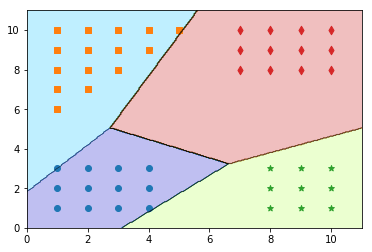

===Done===


In [119]:
n = 256
x = np.linspace(0,11,n)
y = np.linspace(0,11,n)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
print "XXX",X.shape, Y.shape, Z.shape
print W
for iy in range(X.shape[0]):
    for ix in range(X.shape[1]):
        test = predict(W,X[iy,ix],Y[iy,ix])
        Z[iy][ix] = test

print Z
C1 = plt.contourf(X, Y, Z, alpha=.25, cmap='jet')
C2 = plt.contour(X, Y, Z, colors='black', alpha=.5, linewidths=.5)

for i in range(4):
    plt.scatter(DATA[i][:,0],DATA[i][:,1], marker=shape[i])
plt.show()
print "===Done==="